In [1]:
from cameo import models
import pandas as pd
import numpy as np

# All available models from http://bigg.ucsd.edu/models database

In [2]:
models.index_models_bigg()

,bigg_id,gene_count,reaction_count,organism,metabolite_count
0,e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72
1,iAB_RBC_283,346,469,Homo sapiens,342
2,iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668
3,iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668
4,iAF692,692,690,Methanosarcina barkeri str. Fusaro,628
...,...,...,...,...,...
103,iYS854,866,1455,Staphylococcus aureus subsp. aureus USA300_TCH...,1335
104,iZ_1308,1308,2721,Escherichia coli O157:H7 str. EDL933,1923
105,RECON1,1905,3741,Homo sapiens,2766
106,Recon3D,2248,10600,Homo sapiens,5835


## Division of organisms

In [3]:
cell_wall_type = {'gram_negative': ['Escherichia coli', 'Geobacter metallireducens', 'Acinetobacter baumannii', 'Helicobacter pylori',
                                   'Synechococcus elongatus', 'Pseudomonas putida', 'Synechocystis sp.', 'Thermotoga maritima',
                                   'Yersinia pestis', 'Shigella flexneri', 'Shigella boydii', 'Shigella dysenteriae', 'Shigella sonnei',
                                    'Klebsiella pneumoniae', 'Salmonella pan-reactome', 'Salmonella enterica'],
                  'gram_positive': ['Clostridioides difficile', 'Mycobacterium tuberculosis', 'Clostridium ljungdahlii', 'Lactococcus lactis',
                                   'Staphylococcus aureus', 'Bacillus subtilis'],
                  'gram_variable': ['Methanosarcina barkeri']}
cell_wall_type_map = {}
for k, v in cell_wall_type.items():
    for organism in v:
        cell_wall_type_map[organism] = k

kingdoms = {'animalia': ['Homo sapiens', 'Cricetulus griseus', 'Mus musculus'],
            'fungi': ['Saccharomyces cerevisiae'],
#             'plantae': [''],
            'chromista': ['Phaeodactylum tricornutum', 'Chlamydomonas reinhardtii'],
            'protozoa': ['Plasmodium berghei', 'Plasmodium cynomolgi', 'Plasmodium knowlesi', 'Plasmodium falciparum',
                         'Plasmodium vivax', 'Trypanosoma cruzi'],
            'bacteria': ['Escherichia coli', 'Methanosarcina barkeri', 'Geobacter metallireducens', 'Acinetobacter baumannii',
                        'Clostridioides difficile', 'Mycobacterium tuberculosis', 'Clostridium ljungdahlii', 'Helicobacter pylori',
                        'Synechococcus elongatus', 'Pseudomonas putida', 'Synechocystis sp.', 'Thermotoga maritima', 'Lactococcus lactis',
                        'Yersinia pestis', 'Shigella flexneri', 'Staphylococcus aureus', 'Shigella dysenteriae', 'Shigella boydii',
                        'Klebsiella pneumoniae', 'Bacillus subtilis', 'Salmonella pan-reactome', 'Salmonella enterica', 'Shigella sonnei']}
kingdoms_map = {}
for k, v in kingdoms.items():
    for organism in v:
        kingdoms_map[organism] = k

empires = {'prokaryota': ['bacteria'],
           'eukaryota': ['animalia', 'fungi', 'chromista', 'protozoa']}

empires_map = {}
for k, v in empires.items():
    for kingdom in v:
        for organism in kingdoms[kingdom]:
            empires_map[organism] = k

bigg_models = models.index_models_bigg().set_index('bigg_id')
bigg_models['organism_type'] = bigg_models['organism'].apply(lambda x: ' '.join(x.split(' ')[:2]))

bigg_models_bacteria = bigg_models[bigg_models['organism_type'].isin(kingdoms['bacteria'])]
bigg_models_bacteria['cell_wall_type'] = bigg_models_bacteria['organism_type'].apply(lambda x: cell_wall_type_map[x])

bigg_models['kingdom'] = bigg_models['organism_type'].apply(lambda x: kingdoms_map[x])

bigg_models['empire'] = bigg_models['organism_type'].apply(lambda x: empires_map[x])

/home/andrzej/anaconda3/envs/ed/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## All organisms classified by the kingdom which they belong to, from Cavalier-Smith six-kingdom model

![six_kingdoms](../img/six_kingdoms.png)

In [4]:
bigg_models.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,kingdom,empire
bigg_id,,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,bacteria,prokaryota
iAB_RBC_283,346,469,Homo sapiens,342,Homo sapiens,animalia,eukaryota
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,bacteria,prokaryota


## Bacteria - classified by their cell wall type: gram_negative, gram_positive, gram_variable

![gram](../img/gram.jpg)

In [5]:
bigg_models_bacteria.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type
bigg_id,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,gram_negative
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,gram_variable
iAF987,987,1285,Geobacter metallireducens GS-15,1109,Geobacter metallireducens,gram_negative


# Extract metabolic pathways into graphs and then embed graphs into feature vector

In [6]:
from cameo.network_analysis.networkx_based import model_to_network
import networkx as nx

def model2graph(model):
    G = model_to_network(model, max_distance=1)
    # Conversion from directed multi graph to directed graph
    return nx.DiGraph(G)

In [5]:
import scipy.stats as stats

def embed_graph(G, model_name):
    graph_embedding = pd.DataFrame(data=[model_name], columns=['Model'])
    
    for value, feature in zip([G.in_degree(), G.out_degree(), nx.clustering(G)], ['vertex in degree', 'vertex out degree', 'clustering coefficient']):
        vector = np.asarray(list(dict(value).values()))
        graph_embedding['avg ' + feature] = vector.mean()
        graph_embedding['std ' + feature] = vector.std()
        graph_embedding['kurtosis ' + feature] = stats.kurtosis(vector)
        graph_embedding['skewness ' + feature] = stats.skew(vector)
        
#     graph_embedding['avg node connectivity'] = nx.average_node_connectivity(G)
#     graph_embedding['avg shortest path length'] = nx.average_shortest_path_length(G)
    
    return graph_embedding.set_index('Model')

In [162]:
from tqdm import tqdm

features = pd.DataFrame()
for idx, model_id in enumerate(tqdm(models.index_models_bigg()['bigg_id'])):
    model = getattr(models.bigg, model_id)
    graph = model2graph(model)
    feature_vector = embed_graph(graph, model_name=model_id)
    features = pd.concat([features, feature_vector])
features.to_csv('embedded_graphs.csv')

100%|██████████| 108/108 [19:37<00:00, 10.91s/it]


In [7]:
features = pd.read_csv('embedded_graphs.csv', index_col='Model')

## FEATURES:

In [8]:
features.head()

,avg vertex in degree,std vertex in degree,kurtosis vertex in degree,skewness vertex in degree,avg vertex out degree,std vertex out degree,kurtosis vertex out degree,skewness vertex out degree,avg clustering coefficient,std clustering coefficient,kurtosis clustering coefficient,skewness clustering coefficient
Model,,,,,,,,,,,,
e_coli_core,6.305556,5.264237,1.401481,1.266130,6.305556,7.469640,7.532070,2.532072,0.316940,0.277065,1.014157,1.212989
iAB_RBC_283,4.388889,8.003157,96.006484,9.214740,4.388889,9.727467,125.736759,10.299814,0.135271,0.153330,3.837053,1.609463
iAF1260,4.503597,15.069085,355.906657,17.749897,4.503597,20.824420,616.767008,22.475074,0.167974,0.161343,0.467154,0.800437
iAF1260b,4.513189,15.118689,354.246729,17.716446,4.513189,20.855686,616.598394,22.468878,0.168321,0.161488,0.451520,0.795348
iAF692,4.977707,11.656010,136.549762,10.848784,4.977707,16.220205,155.000438,11.435460,0.224562,0.196762,0.368874,0.749343


# Analysis - all organisms

### Scale features

In [9]:
# features_scaled = (features - features.mean()) / features.std()
features_scaled = (features - features.min(axis=0)) / (features.max(axis=0) - features.min(axis=0))

# Hierarchical clustering

### Draw dendogram in order to find number of clusters we are intrested in

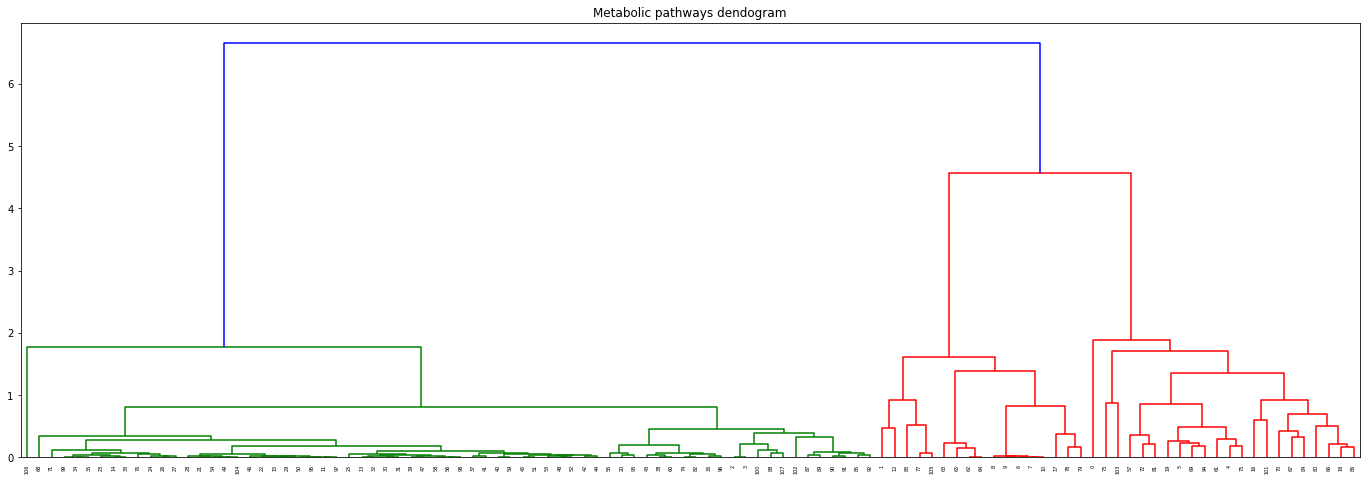

In [10]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
plt.title("Metabolic pathways dendogram")
dend = shc.dendrogram(shc.linkage(features_scaled, method='ward'))

## Lets see how well clustering organisms into 2 groupd corresponds to 2 empires that all living organisms belong to

In [11]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
clusters = model.fit_predict(features_scaled)
bigg_models['cluster'] = clusters

In [12]:
bigg_models.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,kingdom,empire,cluster
bigg_id,,,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,bacteria,prokaryota,0
iAB_RBC_283,346,469,Homo sapiens,342,Homo sapiens,animalia,eukaryota,0
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota,1
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota,1
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,bacteria,prokaryota,0


In [13]:
pd.DataFrame(bigg_models.groupby(['empire', 'cluster']).agg({'kingdom': 'count'})).rename(columns={'kingdom': 'models_count'})

models_count
empire     cluster              
eukaryota  0                  19
           1                   1
prokaryota 0                  20
           1                  68

#### We can see that hierarchical clustering was able to group organisms into 2 empires based on their metabollic pathways really well.
- eukaryota: 19 out of all 20 eukaryota organisms where correctly put into cluster 1
- prokaryota: 68 out of all 88 prokaryota organisms where correctly put into cluster 0

# Lets visualise clusteres in the feature space reduced to 2 dimensions with tSNE

In [14]:
def plot_2d_scatter(X, y, simple=False):
    fig, plot = plt.subplots()
    fig.set_size_inches(15, 8)
    plt.prism()
    labels_map = {0: 'true eukaryota',
                  1: 'false prokaryota',
                  2: 'true prokaryota',
                  3: 'false eukaryota',}

    for i in range(max(y)+1):
        cluster = np.where(y == i)
        dim1 = X[cluster, 0]
        dim2 = X[cluster, 1]
        if simple:
            label = str(i)
        else:
            label = labels_map[i]
        plot.scatter(dim1, dim2, label=label)

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.title('Clusters resolved with hierarchical clustering in 2 dimensions')
    plt.show()

In [15]:
from sklearn.manifold import TSNE
bigg_models['labels'] = bigg_models['cluster']
bigg_models.loc[bigg_models[(bigg_models['empire'] == 'eukaryota') & (bigg_models['cluster'] == 0)].index, 'labels'] = 0
bigg_models.loc[bigg_models[(bigg_models['empire'] == 'eukaryota') & (bigg_models['cluster'] == 1)].index, 'labels'] = 1
bigg_models.loc[bigg_models[(bigg_models['empire'] == 'prokaryota') & (bigg_models['cluster'] == 1)].index, 'labels'] = 2
bigg_models.loc[bigg_models[(bigg_models['empire'] == 'prokaryota') & (bigg_models['cluster'] == 0)].index, 'labels'] = 3

tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features_scaled)

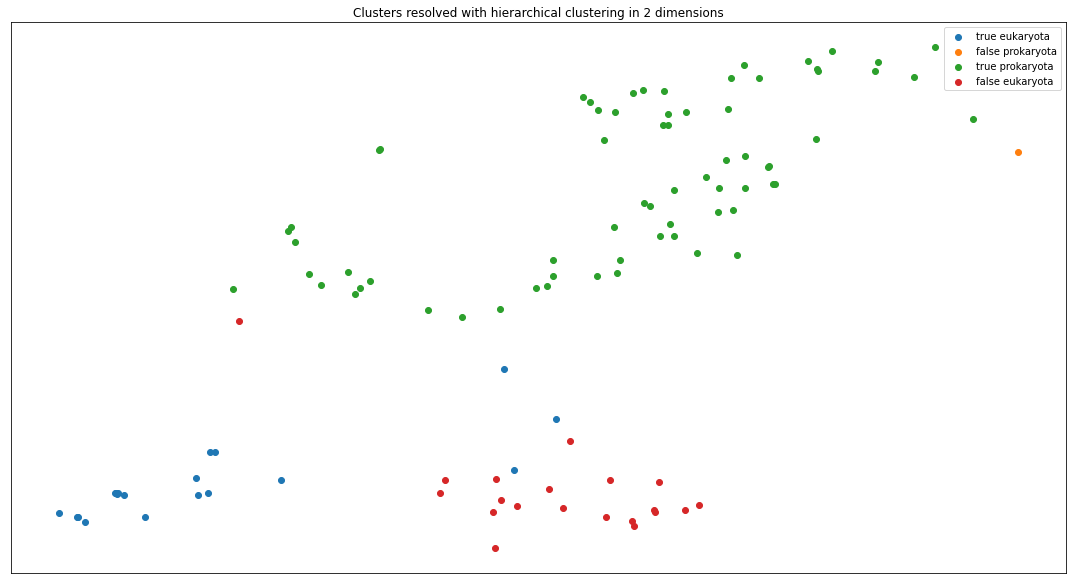

In [16]:
plot_2d_scatter(features_tsne, bigg_models['labels'])

## Lets see how well clustering organisms into 5 groups corresponds to 5 kingdoms that organisms from our data belong to

In [17]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=7, linkage='ward')
clusters = model.fit_predict(features_scaled)
bigg_models['cluster'] = clusters
bigg_models['true_cluster'] = pd.factorize(bigg_models['kingdom'], sort=True)[0]

In [18]:
bigg_models.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,kingdom,empire,cluster,labels,true_cluster
bigg_id,,,,,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,bacteria,prokaryota,3,3,1
iAB_RBC_283,346,469,Homo sapiens,342,Homo sapiens,animalia,eukaryota,6,0,0
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota,1,2,1
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,bacteria,prokaryota,1,2,1
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,bacteria,prokaryota,2,3,1


In [19]:
pd.DataFrame(bigg_models.groupby(['kingdom', 'cluster']).agg({'empire': 'count'})).rename(columns={'empire': 'models_count'})

models_count
kingdom   cluster              
animalia  0                   1
          2                   1
          4                   1
          6                   4
bacteria  1                  68
          2                  17
          3                   1
          5                   1
          6                   1
chromista 2                   1
          5                   1
fungi     0                   2
protozoa  0                   9

#### We can see that hierarchical clustering was able to group organisms into 5 kingdoms based on their metabollic pathways a bit worse than into empires but still pretty well.
- animalia: 4 out of all 7 animalia organisms where correctly put into cluster 6
- bacteria: 85 out of all 88 bacteria organisms where correctly put into cluster 1 or 2
- chromista: 1 out of all 2 chromista organisms where correctly put into cluster 5
- fungi: 2 out of all 2 fungi organisms where incorrectly put into cluster 0 and should be in cluster 3
- protozoa: 9 out of all 9 protozoa organisms where correctly put into cluster 0

# Lets visualise clusteres in the feature space reduced to 2 dimensions with tSNE

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features_scaled)

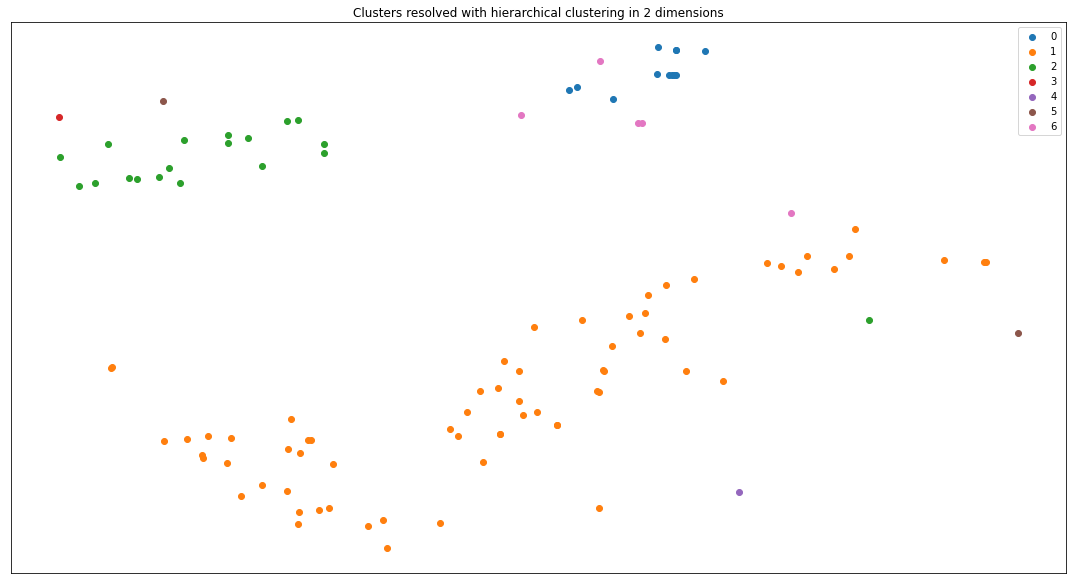

In [21]:
plot_2d_scatter(features_tsne, bigg_models['cluster'], simple=True)

## Lets see how well grouping bacteria into 3 clusters corresponds to 3 types of bacteria cell walls

In [22]:
features_scaled_bacteria = features_scaled.loc[bigg_models_bacteria.index]

### Draw dendogram in order to find number of clusters we are intrested in

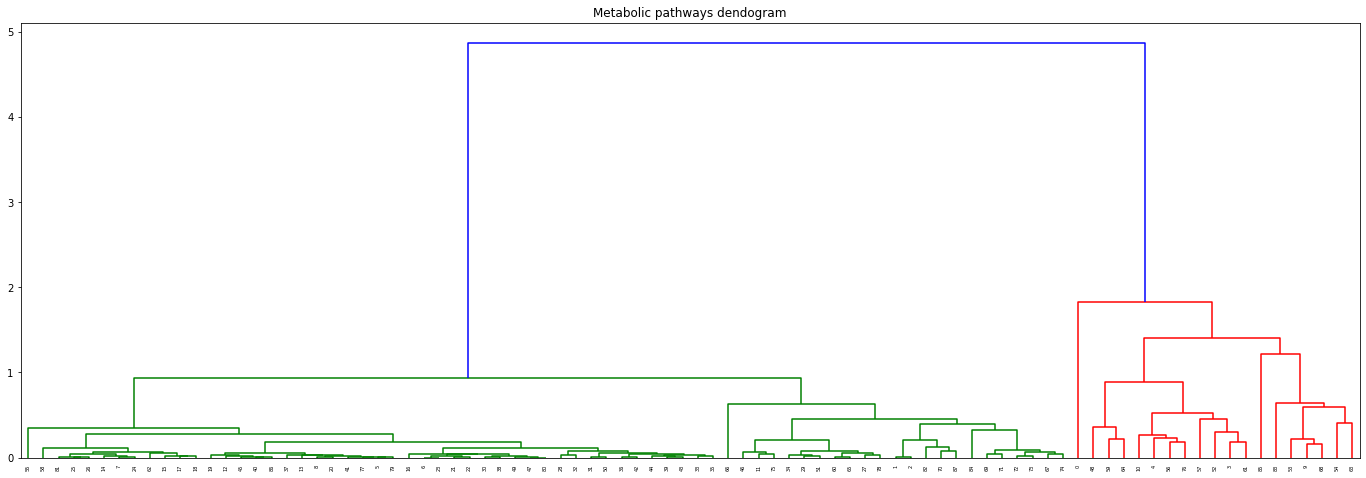

In [23]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
plt.title("Metabolic pathways dendogram")
dend = shc.dendrogram(shc.linkage(features_scaled_bacteria, method='ward'))

In [24]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = model.fit_predict(features_scaled_bacteria)
bigg_models_bacteria['cluster'] = clusters

/home/andrzej/anaconda3/envs/ed/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
bigg_models_bacteria.head()

,gene_count,reaction_count,organism,metabolite_count,organism_type,cell_wall_type,cluster
bigg_id,,,,,,,
e_coli_core,137,95,Escherichia coli str. K-12 substr. MG1655,72,Escherichia coli,gram_negative,2
iAF1260,1261,2382,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative,1
iAF1260b,1261,2388,Escherichia coli str. K-12 substr. MG1655,1668,Escherichia coli,gram_negative,1
iAF692,692,690,Methanosarcina barkeri str. Fusaro,628,Methanosarcina barkeri,gram_variable,0
iAF987,987,1285,Geobacter metallireducens GS-15,1109,Geobacter metallireducens,gram_negative,0


In [26]:
pd.DataFrame(bigg_models_bacteria.groupby(['cell_wall_type', 'cluster']).agg({'metabolite_count': 'count'})).rename(columns={'metabolite_count': 'models_count'})

models_count
cell_wall_type cluster              
gram_negative  0                   9
               1                  69
               2                   1
gram_positive  0                   8
gram_variable  0                   1

#### We can see that hierarchical clustering was able to group bacteria into 3 types based on their metabollic pathways very well.
- gram_negative: 69 out of all 79 gram_negative bacteria where correctly put into cluster 1
- gram_positive: 8 out of all 8 gram_positive bacteria where correctly put into cluster 0
- gram_variable: 1 out of all 1 gram_variable bacteria where incorrectly put into cluster 0 and should be put into cluster 2

# Lets visualise clusteres in the feature space reduced to 2 dimensions with tSNE

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features_scaled_bacteria)

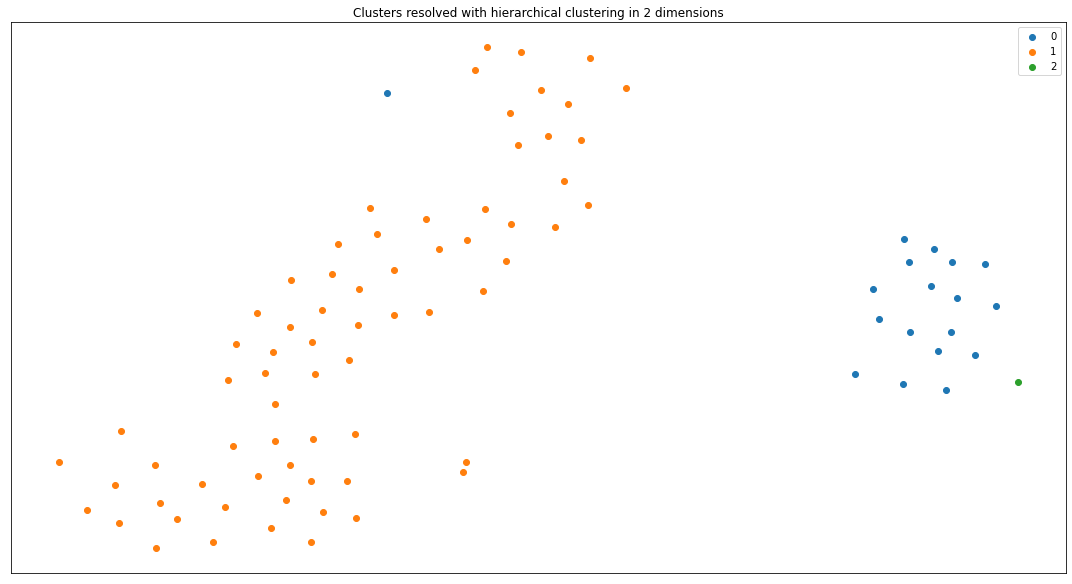

In [28]:
plot_2d_scatter(features_tsne, bigg_models_bacteria['cluster'], simple=True)